# Workshop 3: Linear, Time-Invariant Systems

##  3.1 Continuous-Time Systems: Convolution Integral

####  3.1.1 Implementing Convolution Using Numerical Integration

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

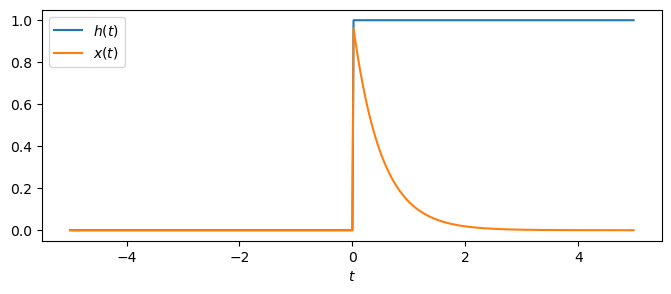

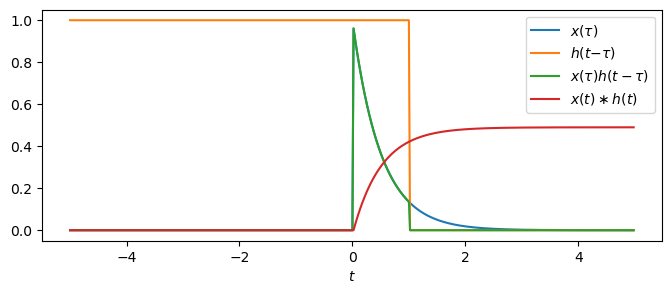

In [2]:
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = −2
Fs = 50 # Sampling frequency for the plotting
T=5 #Timerange
t = np.arange(-T, T, 1/Fs) # Time samples

plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()

# Plotting
t_ = 1 # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t − \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')

# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simps(product(t), t) # Actual convolution at time t
    
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend();

#### 3.1.2 Convolving with a Signal Composed of Impulse Functions

In [3]:
fs = 1000 # Sampling frequency for the plotting
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])

#### Task 2. Use Simpson’s rule integration

$$\int_{\infty }^{-\infty}\delta(t)dt$$

In [4]:
t = np.arange(-T, T, 1/fs) # Time samples for delta function

# Integration Simpson's rule
y_delta = integrate.simps(delta(t), t)

# Output the calculated value
print(y_delta)

1.000000000000334




$$y(t) = x(t)*h(t)$$

![workshop ](workshop3_image1.jpg)

In [ ]:
# Defining new h function
x_2 = lambda t: (t > 0) * np.exp(-2*t) # a = −2
h_2 = lambda t: delta(t+2) + delta(t-1)

fs = 1000 # Sampling frequency for the plotting
T=5 # Timerange
t = np.arange(-T, T, 1/fs) # Time samples


# Computing the convolution using integration by simpson's rule
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product_2 = lambda tau: x_2(tau) * h_2(t_ - tau) # Get the product
    y[n] = integrate.simps(product_2(t), t) # Actual convolution at time t

# Plotting
plt.figure(figsize=(8,3))
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend();

## 3.2 Discrete-Time Systems: Convolution Sum


In [13]:
# Input signal
x = np.array([0, 1, 1, 2, 0])

# Unit impulse response
h = np.array([0, 0, 0, 3, 1, 0, 0])

hr = np.flip(h)
xo = 2
ho = 4

# Length of the output signal
y = np.zeros(len(x) + len(h) - 1)

for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n -1)
    hkmax = min(len(h), len(x) + len(h) - n - 1)
    y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


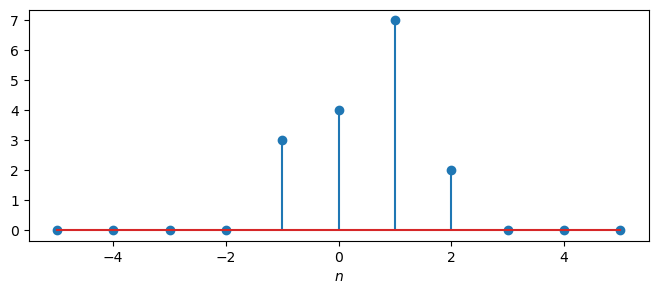

In [14]:
# Creating the interval [-5, 5]
n = np.arange(-5, 6, 1, dtype=int)

plt.figure(figsize=(8,3))
plt.stem(n, y) # Plotting the output y
plt.xlabel(r'$n$');

**Comments**
The output function has 4 non-zero values. The maximum value of the output signal is 7. 

In [15]:
# Input signal
x_2 = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])

# Impulse response
h_2 = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])

hr = np.flip(h_2)
xo = 2
ho = 4

# Defining a vector for output signal
y_2 = np.zeros(len(x_2) + len(h_2) - 1)

for n in range(len(y_2)):
    xkmin = max(0, n - len(h_2) + 1)
    xkmax = min(len(x_2), n + 1)
    hkmin = max(0, len(h_2) - n -1)
    hkmax = min(len(h_2), len(x_2) + len(h_2) - n - 1)
    y_2[n] = np.sum(x_2[xkmin:xkmax]*hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y_2[n]))

y[0] = x[0:1]*h[8:9] = 0.0
y[1] = x[0:2]*h[7:9] = 0.0
y[2] = x[0:3]*h[6:9] = 0.0
y[3] = x[0:4]*h[5:9] = 0.0
y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0
y[13] = x[5:9]*h[0:4] = 0.0
y[14] = x[6:9]*h[0:3] = 0.0
y[15] = x[7:9]*h[0:2] = 0.0
y[16] = x[8:9]*h[0:1] = 0.0


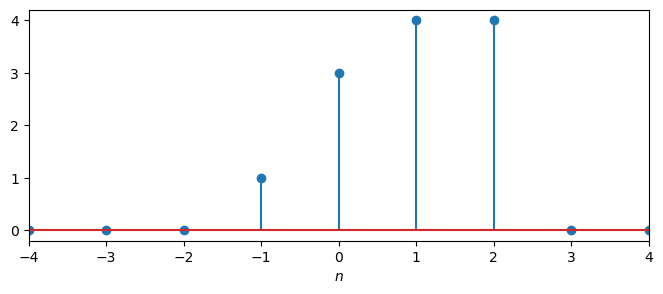

In [16]:
# Range of n values [-8, 8]
n = np.arange(-8, 9, 1, dtype=int)

plt.figure(figsize=(8,3))
plt.stem(n, y_2) # Plotting the output y against n
plt.xlabel(r'$n$');
plt.xlim(-4,4); # limiting the n range to [-4, 4]

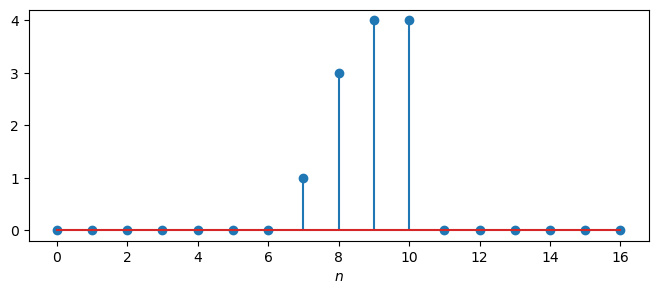

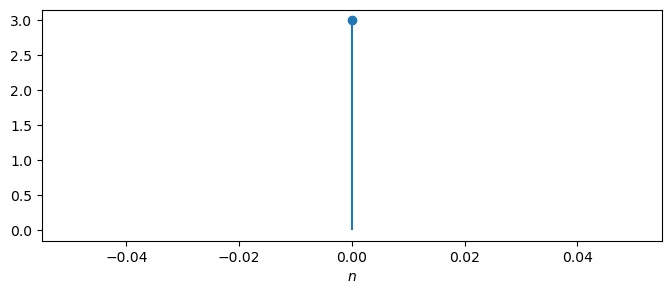

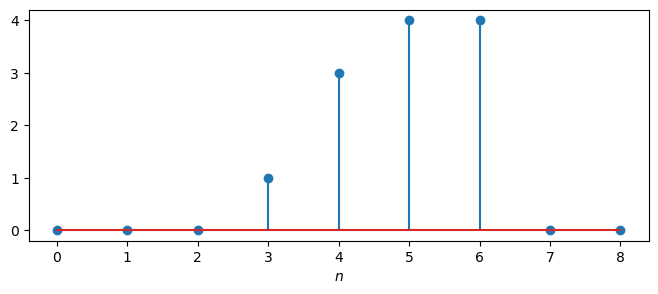

In [17]:
from scipy import signal
# Convolving using signal.convolve()
y_full = signal.convolve(x_2, h_2, mode='full')
y_valid = signal.convolve(x_2, h_2, mode='valid')
y_same = signal.convolve(x_2, h_2, mode='same')

# Full
n = np.arange(-8, 9, 1, dtype=int)
plt.figure(figsize=(8,3))
plt.stem(y_full) # Plotting the output y for mode='full'
plt.xlabel(r'$n$');

# Valid
plt.figure(figsize=(8,3))
plt.stem(y_valid) # Plotting the output y for mode='valid'
plt.xlabel(r'$n$');

# Same
n = np.arange(-8, 9, 1, dtype=int)
plt.figure(figsize=(8,3))
plt.stem(y_same) # Plotting the output y for mode='same'
plt.xlabel(r'$n$');

##### Effect of modes

**full** - gives output for the full range of n values with an interval of length 8 + 8 - 1 = 15 <br>
**valid** - calculates convolution only when the h[n] is fully overlapping with x[n]. For this example, there is only one such instance so the convolution output has only one value.<br>
**same** - calculates convolution and gives the output for the range of values of n where x is defined (same length interval as x)<br>

## 3.3 An Application in Audio Signal Filtering


#### Task 8. Noting that data may have a pair of channels (stereo) use convolution to filter the audio signal.


In [18]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


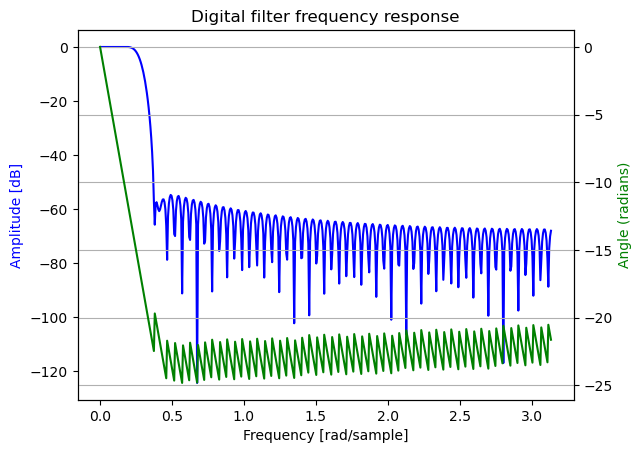

In [19]:
# Imports
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Reading audio file
data, samplerate = sf.read('anthem.wav')

# Setting sampling rate
nyquist = samplerate//2
fc = 2000/nyquist # Cut off frequency
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)

# plotting
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))

ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# Convolution step
ch1 = signal.convolve(data[:, 0], b, mode='same')
ch2 = signal.convolve(data[:, 1], b, mode='same')

# Write output sound file
sf.write('audio_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)

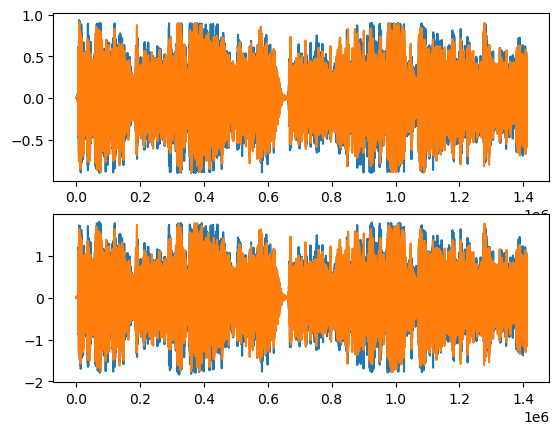

In [20]:
# Plotting the waveform
fig, ax = plt.subplots(2,1)

ax[0].plot(data);
ax[1].plot(np.vstack((ch1, ch2)).T + data);

#### Task 9. Creatively achieve various filtering effects.


In [21]:
# Lowpass filter
b, a = signal.cheby1(4, 5, 100, 'low', analog=True)

# Convolution step
ch1 = signal.convolve(data[:, 0], b, mode='same')
ch2 = signal.convolve(data[:, 1], b, mode='same')

# Create output sound file
sf.write('audio_filtered_lowpass.wav', np.vstack((ch1, ch2)).T + data, samplerate)

# Butterworth filter
b, a = signal.butter(4, 100, 'low', analog=True)

# Convolution step
ch1 = signal.convolve(data[:, 0], b, mode='same')
ch2 = signal.convolve(data[:, 1], b, mode='same')

# Create output sound file
sf.write('audio_filtered_butter.wav', np.vstack((ch1, ch2)).T + data, samplerate)

## 3.4 Convolution Sum in 2-D


#### Task 10. Convolve the image 𝑥[𝑚, 𝑛] with filter h[𝑚, 𝑛]. Hint: Use signal.convolve2d


[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


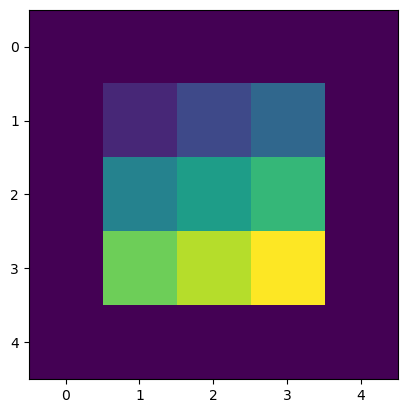

In [22]:
# Input image
x = np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]])

# Filter
h = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

# Output image
y = signal.convolve2d(x, h, mode='same')

# Display the output
print(y)
plt.imshow(y);

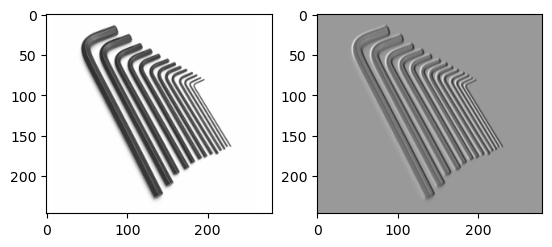

In [23]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the input image
x = mpimg.imread('allenkeys.png')

# Convert the image to grayscale
x_gray = np.dot(x[...,:3], [0.2989, 0.5870, 0.1140])

# Display input image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x, cmap='gray')  # Show input image

# Define the convolution filter
h = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 3]])

# Perform convolution
output_image = convolve2d(x_gray, h, mode='same')

# Display output image
ax[1].imshow(output_image, cmap='gray')  # Show output image

plt.show()
